<a href="https://colab.research.google.com/github/aakash0812/ConsumerAnalytics/blob/main/Consumer_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_excel('Alibaba-network.xlsx', index_col=0)
print(df)

     1    2    3    4    5    6    7    8    9    10   ...  518  519  520  \
1      0    0    0    0    0    1    0    0    0    0  ...    0    0    0   
2      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
5      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
523    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
524    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
525    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
526    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
527    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     521  522  523  524  525  526  527  
1      0    0    0    0    0    0 

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [84]:
G = nx.DiGraph()

In [86]:
for col in df.columns:
  G.add_node(col)

In [89]:
for row in df.index:
  for col in df.columns:
    if df.loc[row,col] ==1:
      G.add_edge(row,col)

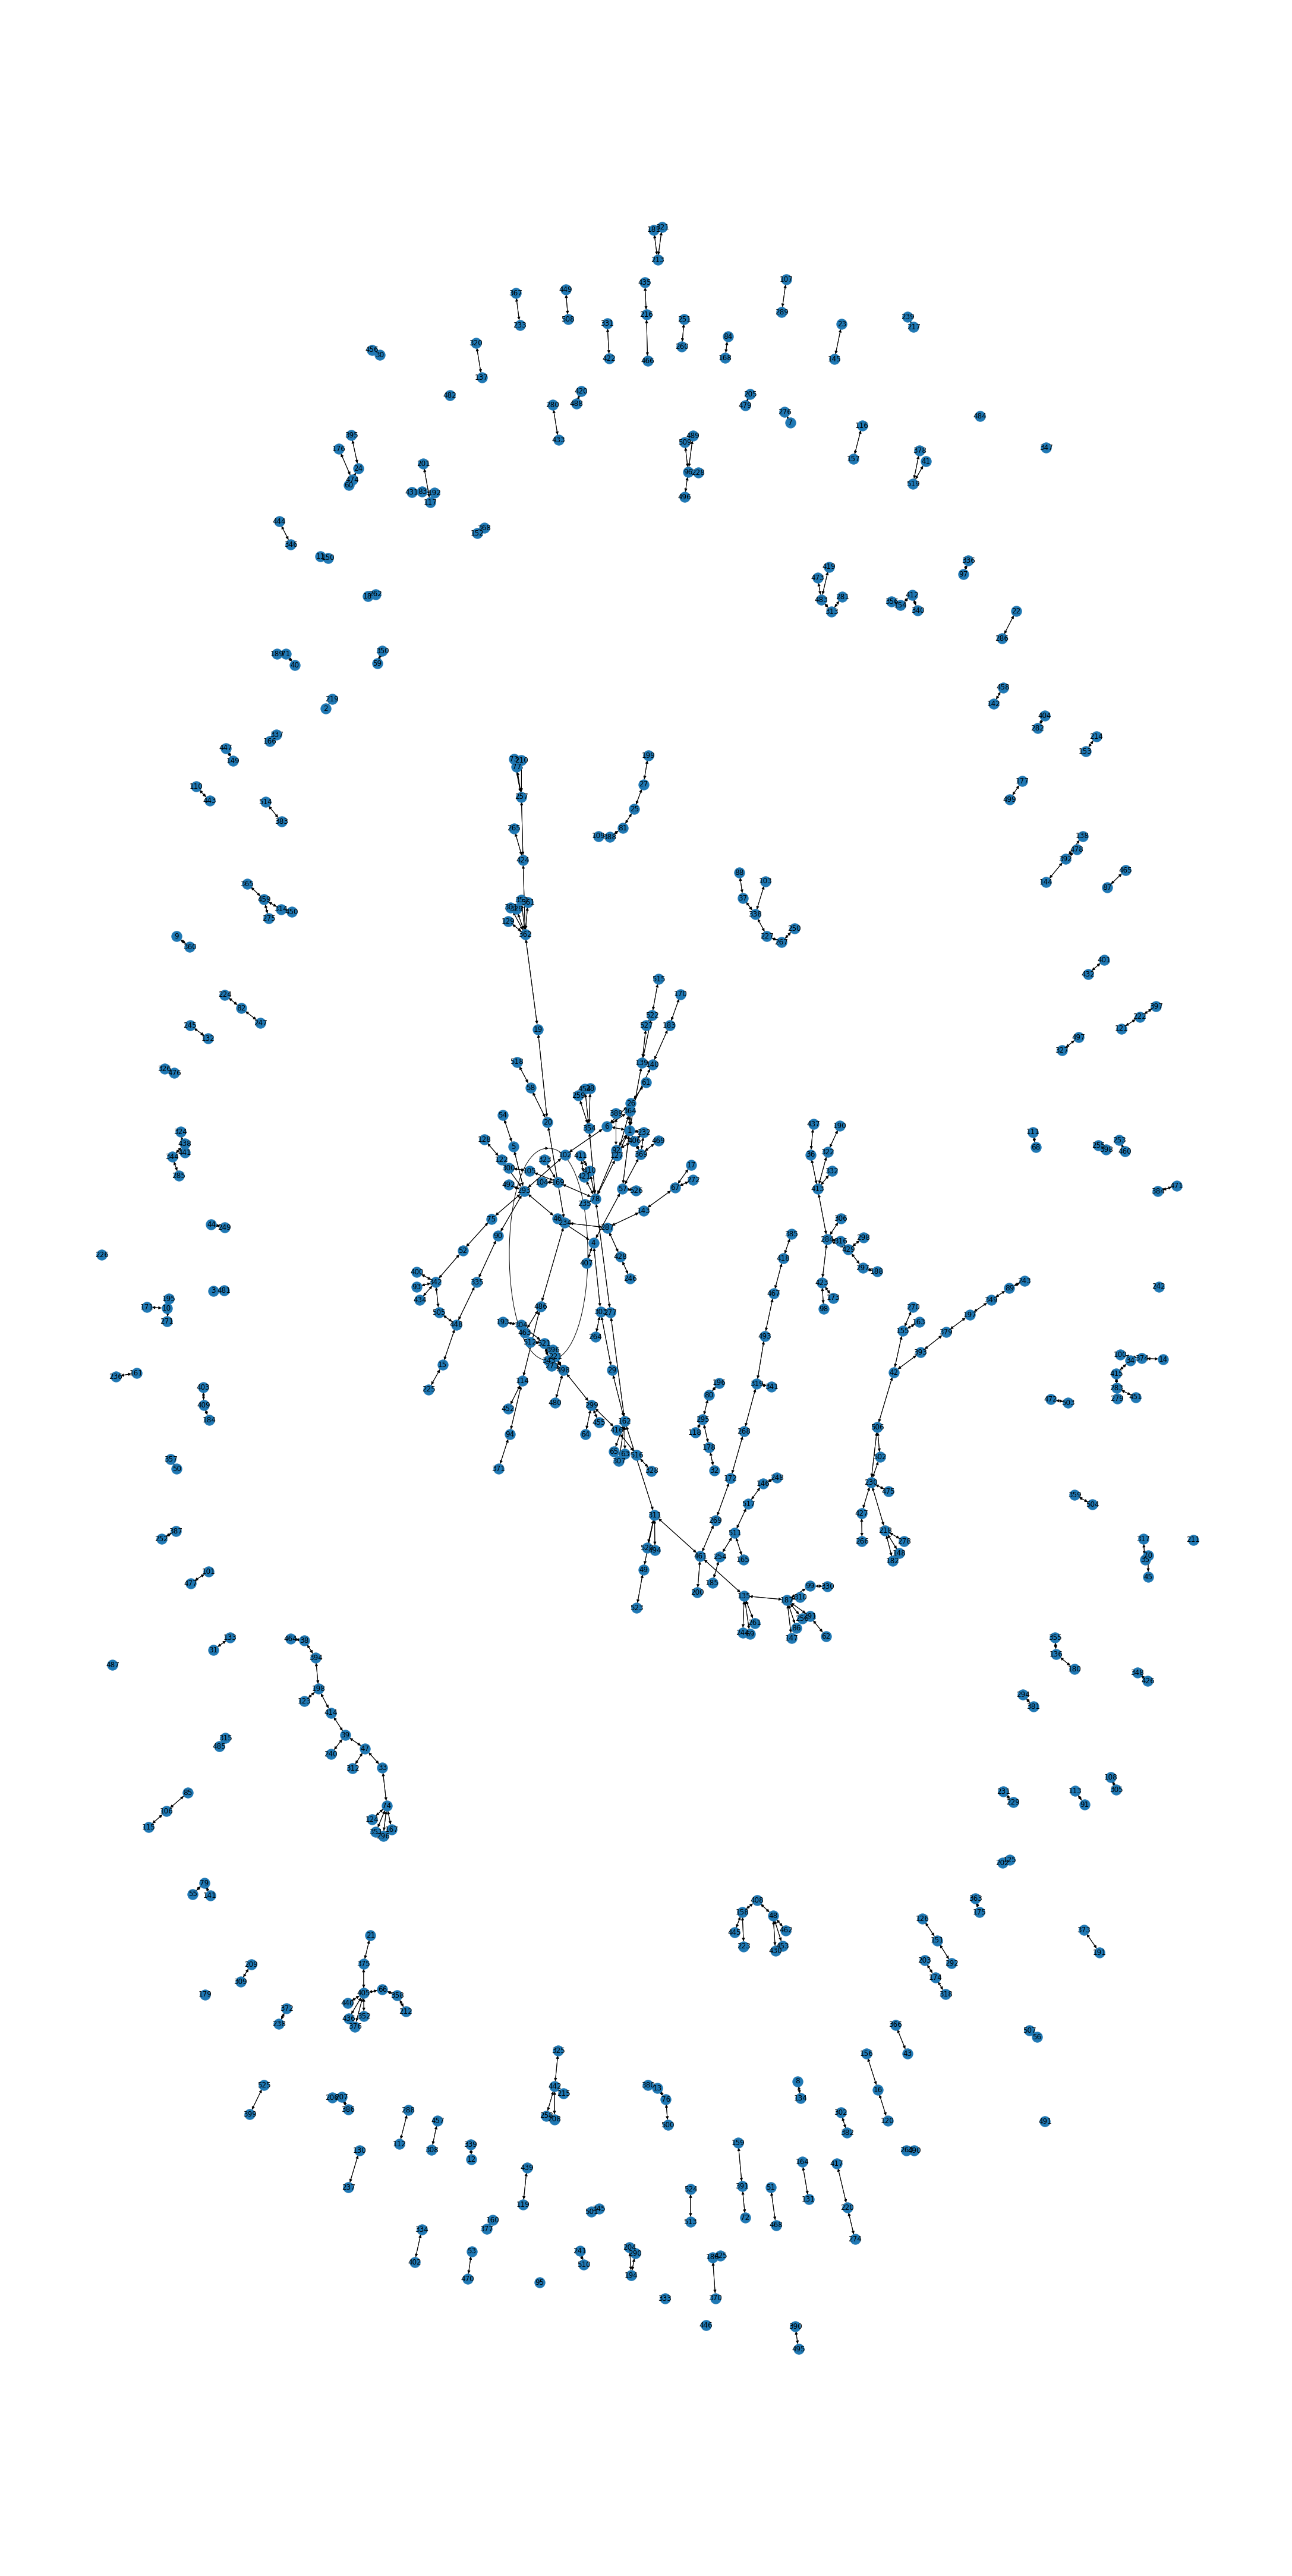

In [90]:
plt.figure(figsize = (30,60))
nx.draw(G, with_labels=True)
plt.show()